In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df = pd.read_csv("kidney.csv")

In [ ]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [ ]:
df.shape

(79, 7)

In [ ]:
df.tail()

,gravity,ph,osmo,cond,urea,calc,target
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1
78,1.015,6.03,416,12.8,178,9.39,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [ ]:
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [ ]:
df.isnull()

,gravity,ph,osmo,cond,urea,calc,target
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
74,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False
77,False,False,False,False,False,False,False


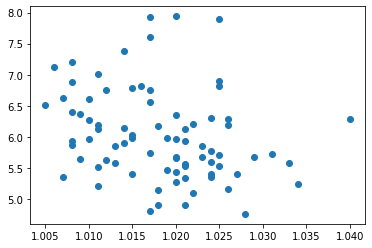

In [ ]:
x = df.gravity
y = df.ph
plt.scatter(x,y)
plt.show()

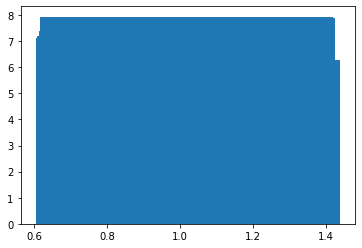

In [ ]:
x = df.gravity
y = df.ph
plt.bar(x,y)
plt.show()

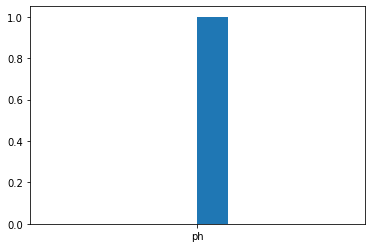

In [ ]:
x = "ph"
plt.hist(x)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

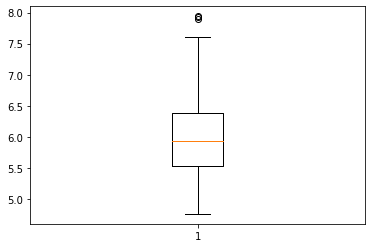

In [ ]:
x = df.ph
plt.boxplot(x)
plt.show

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

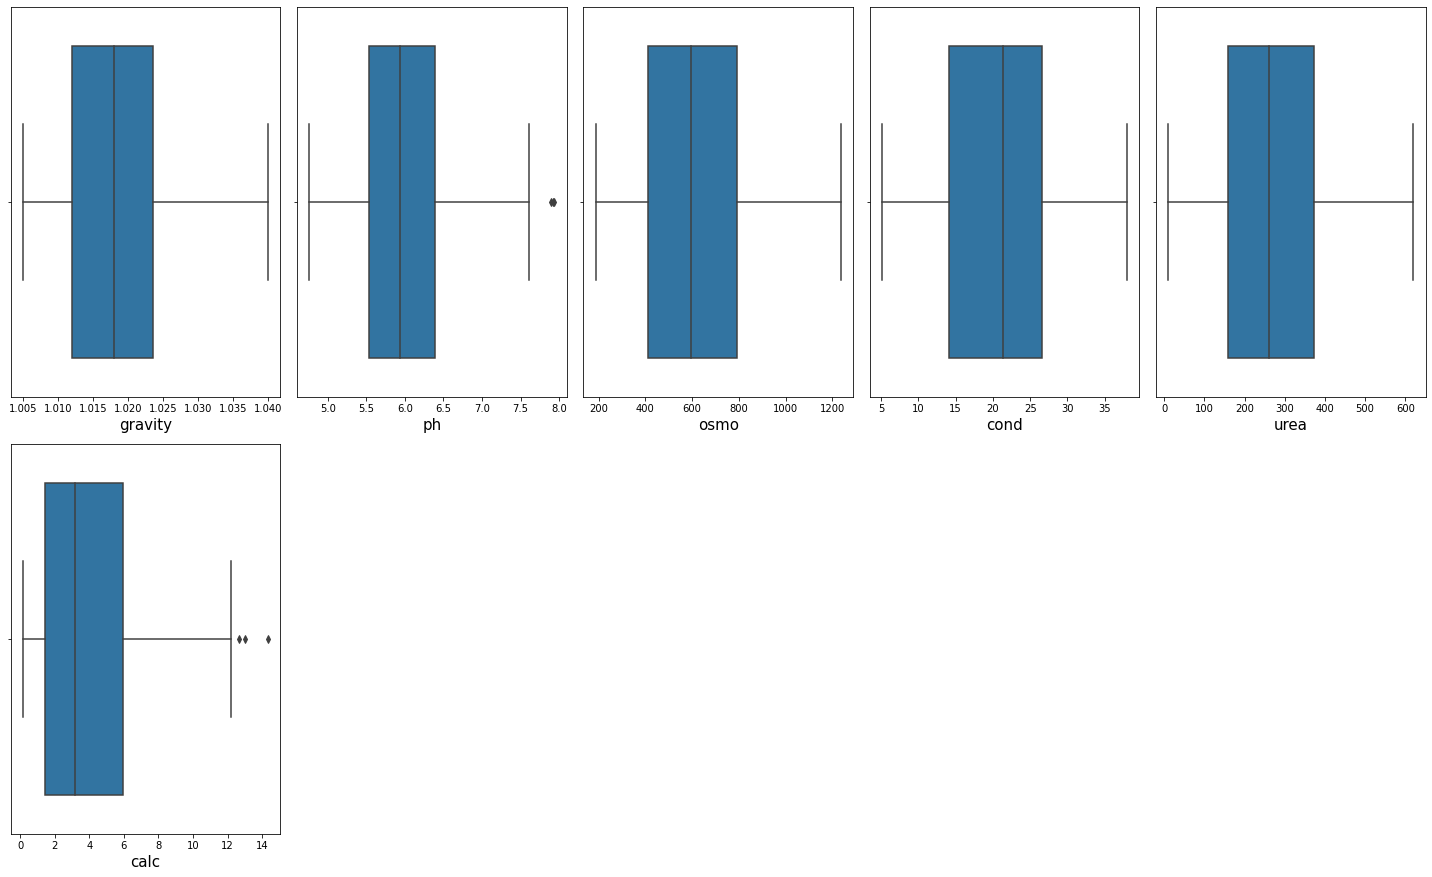

In [ ]:
plt.figure(figsize = (20,30))
plotnumber = 1
for col in df.columns:
  if plotnumber  <=6:
    ax = plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col,fontsize = 15)

  plotnumber += 1
plt.tight_layout()  

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

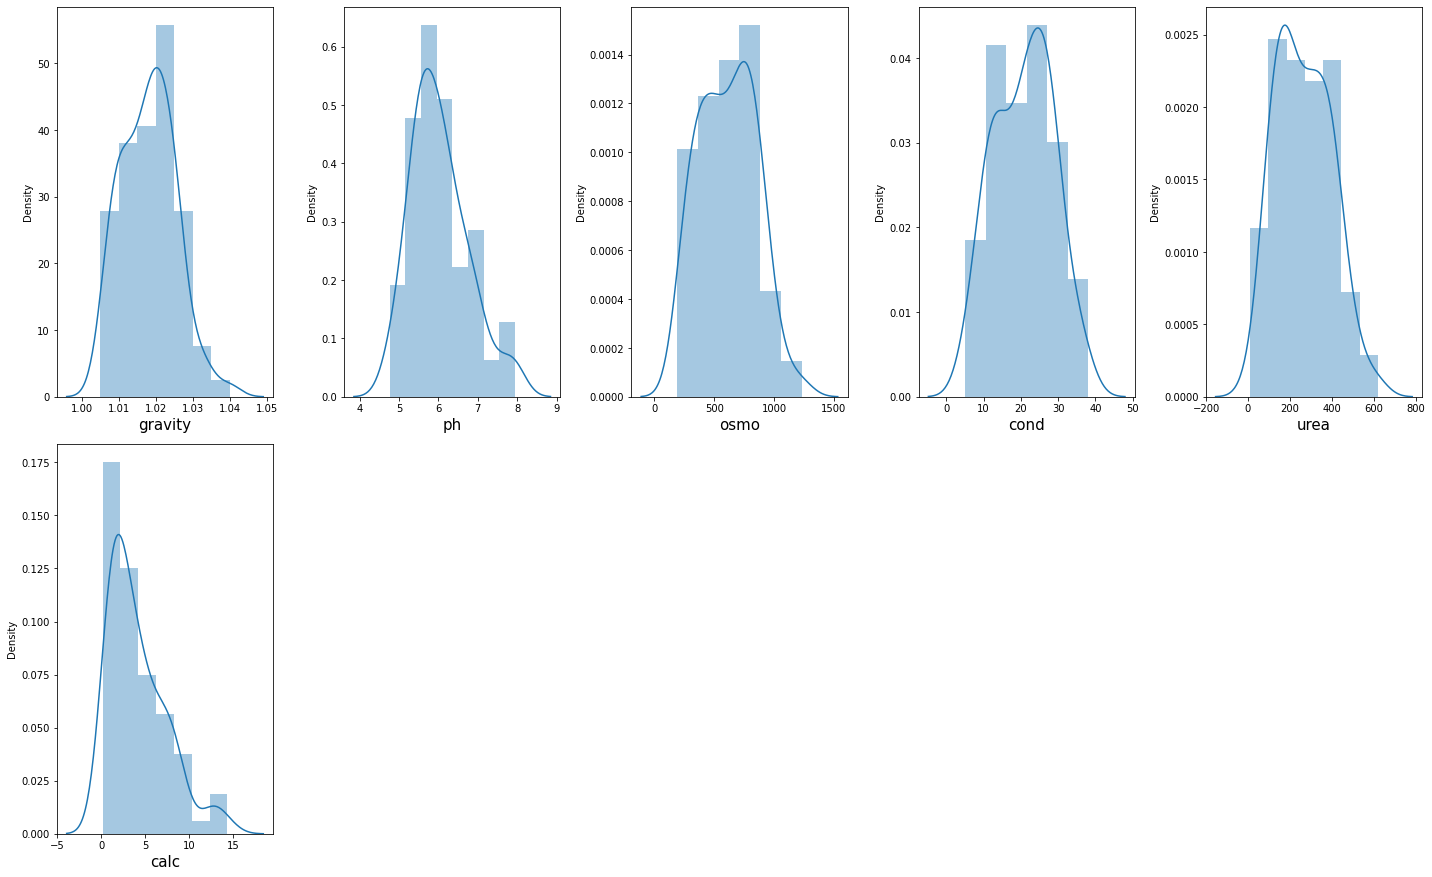

In [ ]:
plt.figure(figsize = (20,30))
plotnumber = 1
for col in df.columns:
  if plotnumber  <=6:
    ax = plt.subplot(5,5,plotnumber)
    sns.distplot(df[col])
    plt.xlabel(col,fontsize = 15)

  plotnumber += 1
plt.tight_layout()  

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

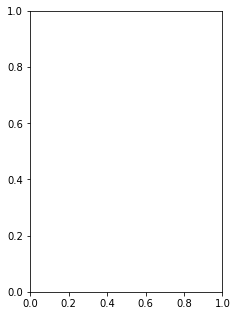

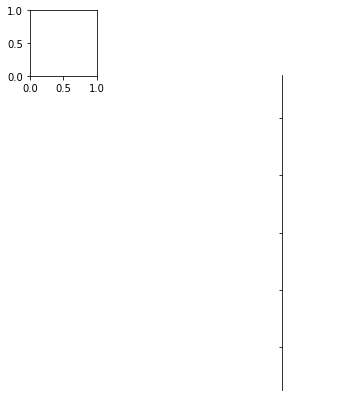

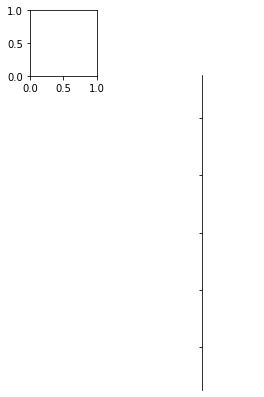

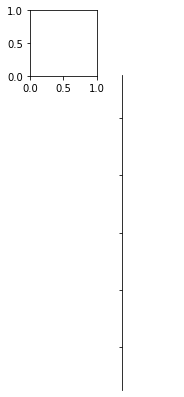

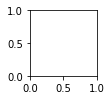

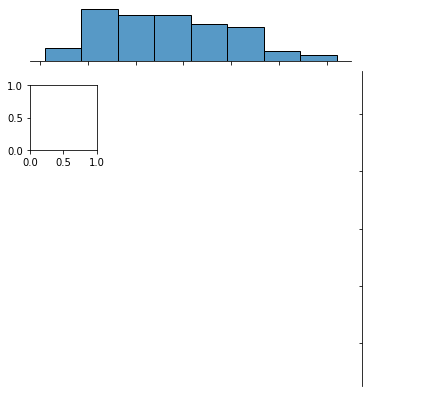

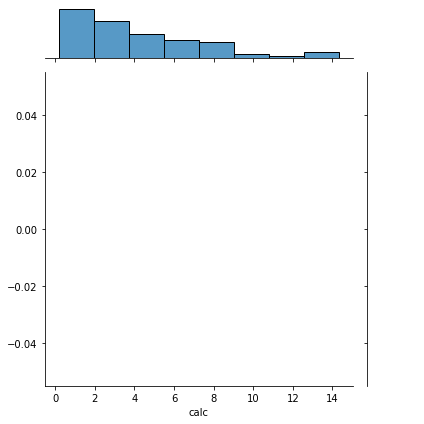

In [ ]:
plt.figure(figsize = (20,30))
plotnumber = 1
for col in df.columns:
  if plotnumber  <=6:
    ax = plt.subplot(5,5,plotnumber)
    sns.jointplot(df[col])
    plt.xlabel(col,fontsize = 15)

  plotnumber += 1
plt.tight_layout()  

plt.show()

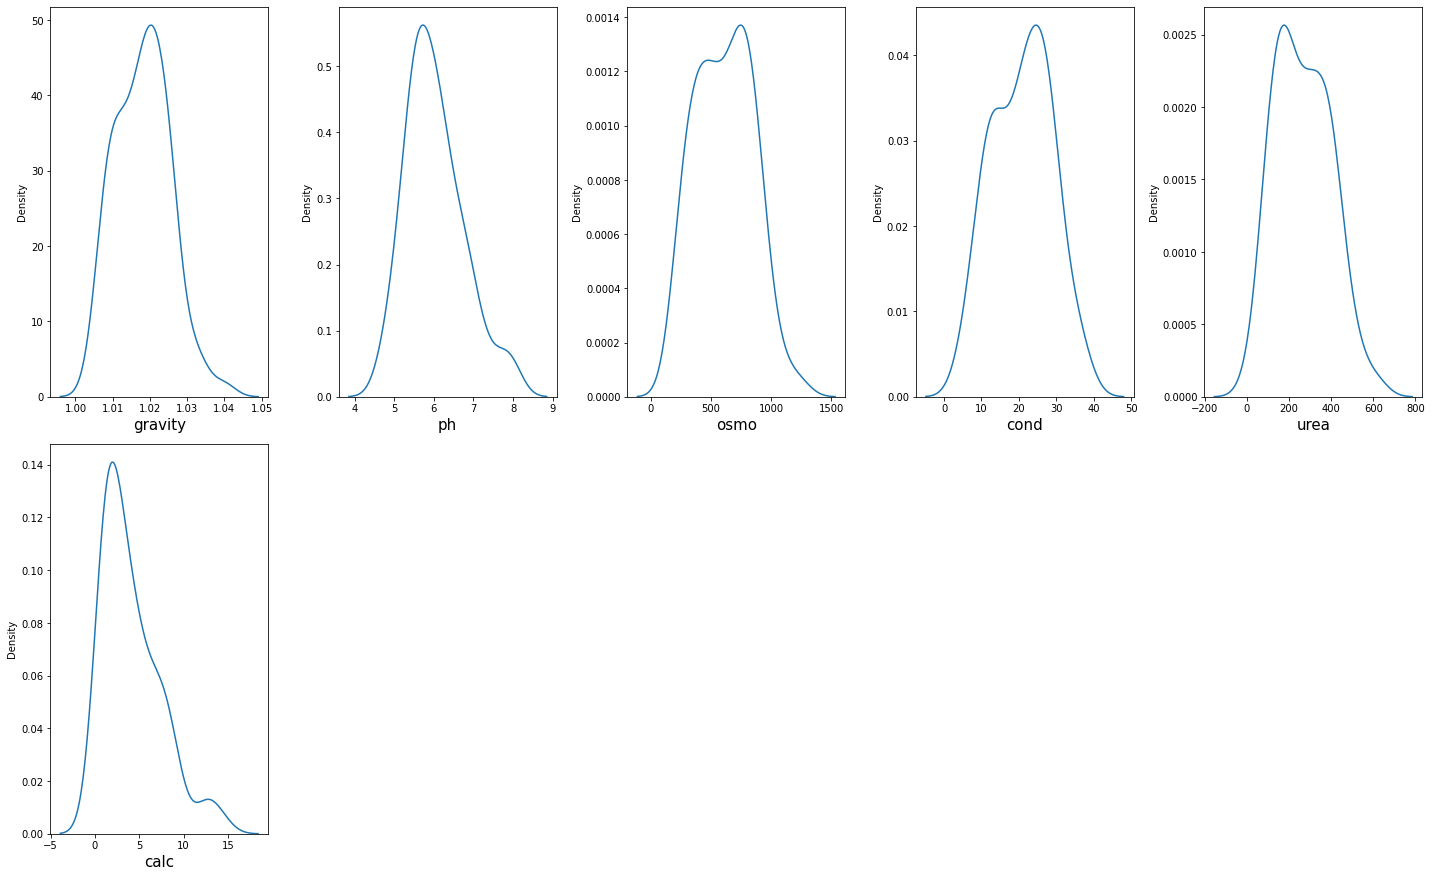

In [ ]:
plt.figure(figsize = (20,30))
plotnumber = 1
for col in df.columns:
  if plotnumber  <=6:
    ax = plt.subplot(5,5,plotnumber)
    sns.kdeplot(df[col])
    plt.xlabel(col,fontsize = 15)

  plotnumber += 1
plt.tight_layout()  

plt.show()

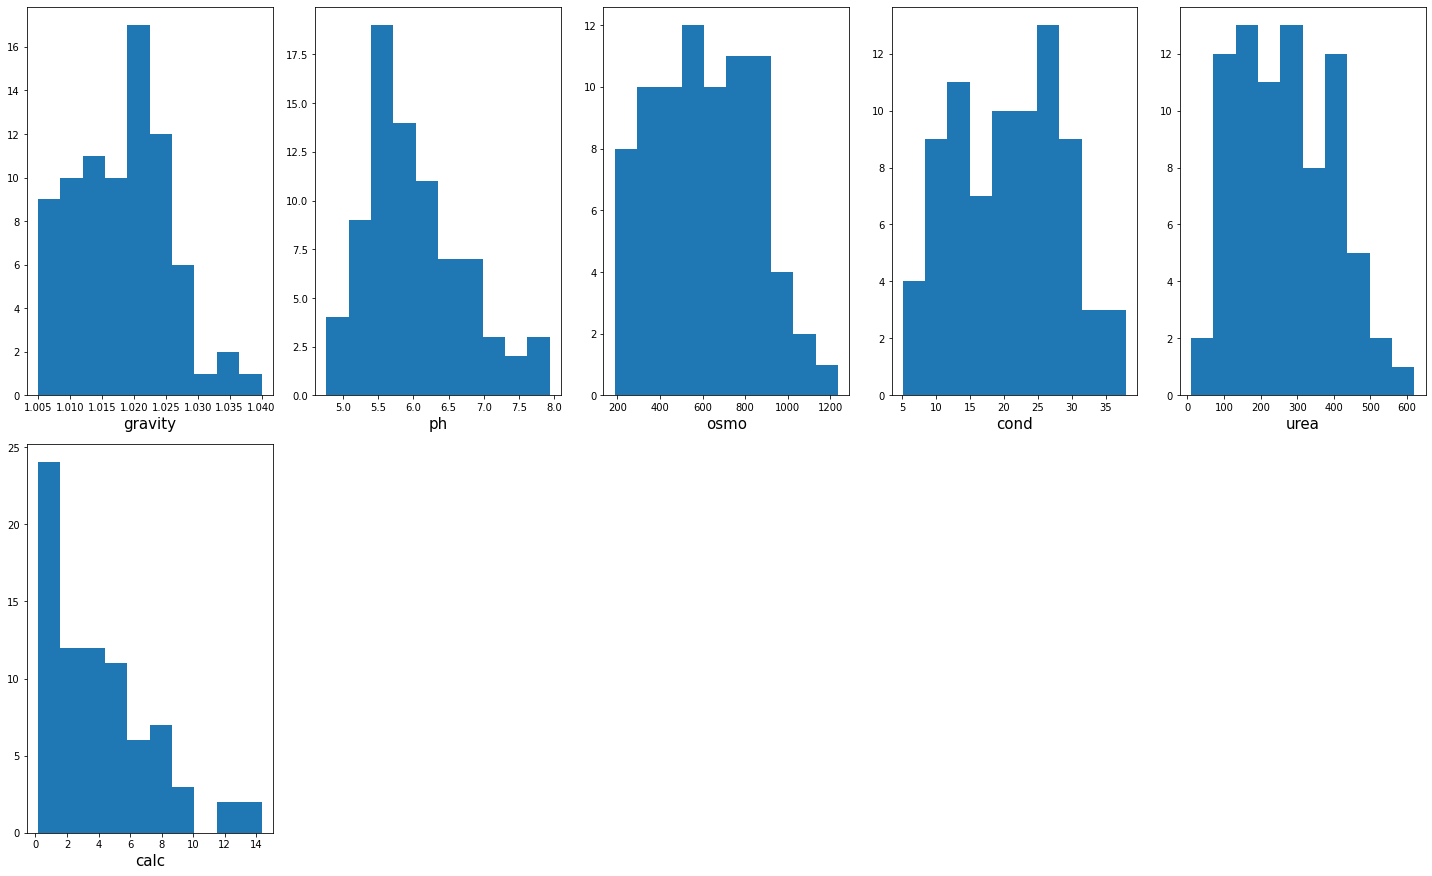

In [ ]:
plt.figure(figsize = (20,30))
plotnumber = 1
for col in df.columns:
  if plotnumber  <=6:
    ax = plt.subplot(5,5,plotnumber)
    plt.hist(df[col])
    plt.xlabel(col,fontsize = 15)

  plotnumber += 1
plt.tight_layout()  

plt.show()

In [ ]:
x = df.drop('target',axis = 1)
y = df['target']

In [ ]:
df.isna().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

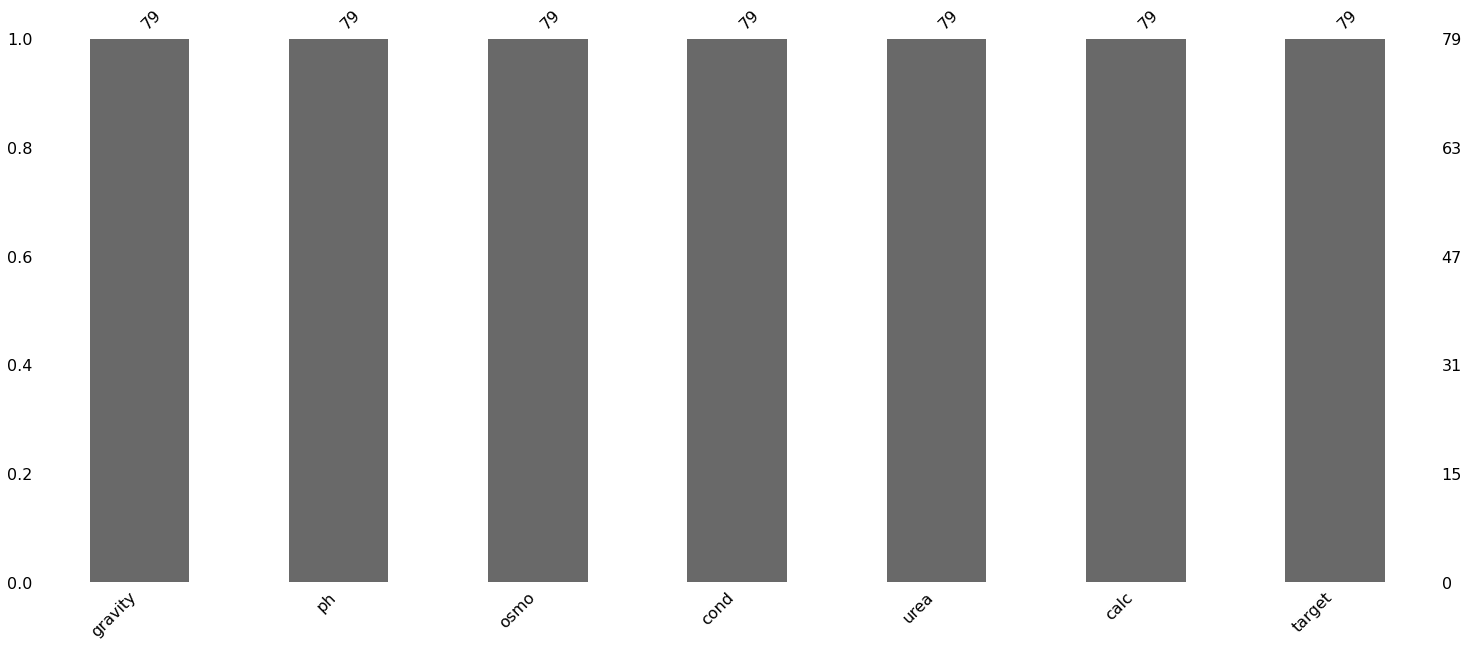

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [ ]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[8, 4],
       [3, 9]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7083333333333334

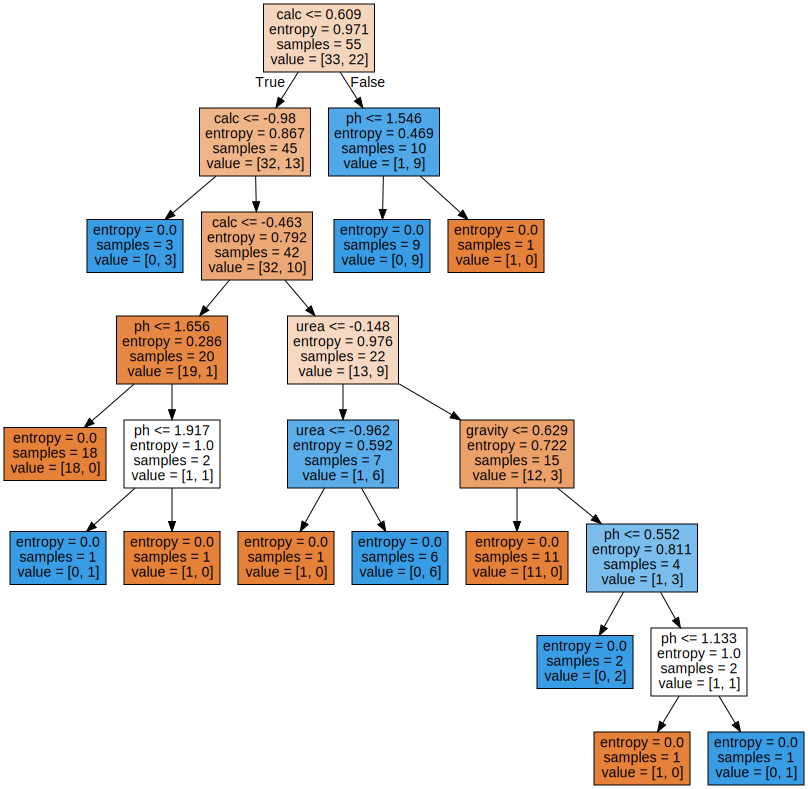

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names=x.columns,filled = True))

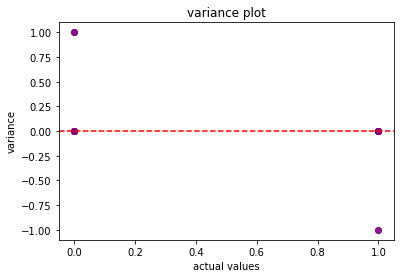

In [ ]:
variance=y_pred - y_test
fig,ax=plt.subplots()
ax.scatter(y_test,variance,color='purple',alpha=0.5)
ax.axhline(y=0, color='red',linestyle='--')
ax.set_xlabel("actual values")
ax.set_ylabel("variance")
ax.set_title("variance plot")
plt.show()

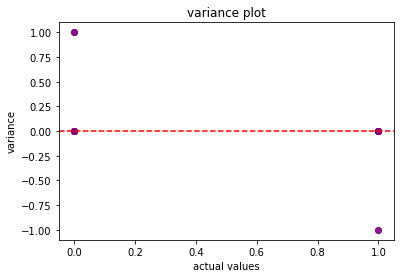

In [ ]:
variance=y_pred - y_test
fig,ax=plt.subplots()
ax.scatter(y_test,variance,color='purple',alpha=0.5)
ax.axhline(y=0, color='red',linestyle='--')
ax.set_xlabel("actual values")
ax.set_ylabel("variance")
ax.set_title("variance plot")
plt.show()